Explicação para uma amostra do conjunto de dados MNIST:


c:\Users\gleilsonpedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gleilsonpedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


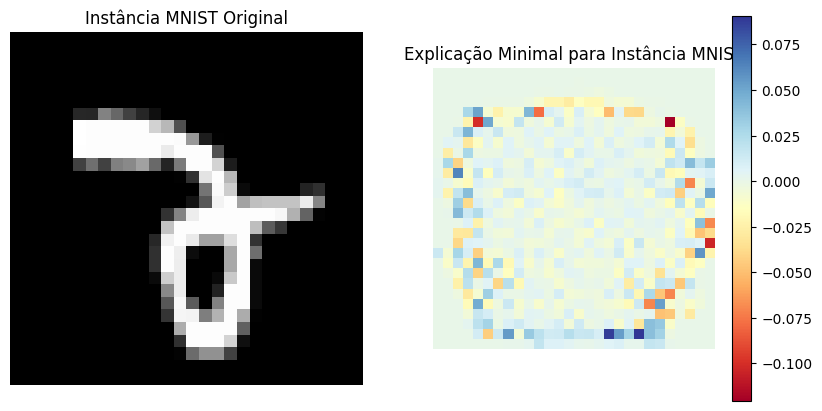

Classe prevista: Classe 2 com probabilidade de 0.97
Coeficientes relevantes para cada classe:
Classe 2: Pixel 12, Pixel 13, Pixel 14, Pixel 15, Pixel 33, Pixel 34, Pixel 35, Pixel 36, Pixel 37, Pixel 38, Pixel 39, Pixel 40, Pixel 41, Pixel 42, Pixel 43, Pixel 44, Pixel 45, Pixel 46, Pixel 61, Pixel 62, Pixel 63, Pixel 64, Pixel 65, Pixel 66, Pixel 67, Pixel 68, Pixel 69, Pixel 70, Pixel 71, Pixel 72, Pixel 73, Pixel 74, Pixel 75, Pixel 76, Pixel 77, Pixel 78, Pixel 79, Pixel 80, Pixel 81, Pixel 86, Pixel 87, Pixel 88, Pixel 89, Pixel 90, Pixel 91, Pixel 92, Pixel 93, Pixel 94, Pixel 95, Pixel 96, Pixel 97, Pixel 98, Pixel 99, Pixel 100, Pixel 101, Pixel 102, Pixel 103, Pixel 104, Pixel 105, Pixel 106, Pixel 107, Pixel 108, Pixel 109, Pixel 114, Pixel 115, Pixel 116, Pixel 117, Pixel 118, Pixel 119, Pixel 120, Pixel 121, Pixel 122, Pixel 123, Pixel 124, Pixel 125, Pixel 126, Pixel 127, Pixel 128, Pixel 129, Pixel 130, Pixel 131, Pixel 132, Pixel 133, Pixel 134, Pixel 135, Pixel 136, Pix

In [12]:
# MNIST COM SOFTMAX

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Carregar o conjunto de dados MNIST
mnist = datasets.fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

# Filtrar para as classes 2, 4 e 7
mnist_classes = [2, 4, 7]
indices = np.isin(y_mnist, mnist_classes)
X_mnist_filtered = X_mnist[indices]
y_mnist_filtered = y_mnist[indices]

# Mapear as classes para um novo conjunto de 0, 1, 2
class_mapping = {2: 0, 4: 1, 7: 2}
y_mnist_mapped = np.vectorize(class_mapping.get)(y_mnist_filtered)

# Treinar o modelo de regressão logística
model_mnist = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_mnist.fit(X_mnist_filtered, y_mnist_mapped)

# Função para fornecer explicações minimais
def explain_prediction_mnist(features, model, target_names):
    probabilities = model.predict_proba([features])[0]
    class_index = np.argmax(probabilities)
    class_probability = probabilities[class_index]
    explanation = f'Classe prevista: {target_names[class_index]} com probabilidade de {class_probability:.2f}\n'
    explanation += 'Coeficientes relevantes para cada classe:\n'
    
    # Obter os coeficientes relevantes para cada classe
    for class_index, class_name in enumerate(target_names):
        relevant_coefs = model.coef_[class_index]
        explanation += f'{class_name}: '
        relevant_indices = np.where(relevant_coefs != 0)[0]
        explanation += ', '.join([f'Pixel {idx}' for idx in relevant_indices])
        explanation += '\n'
    
    # Criar uma matriz de zeros para representar a imagem
    image = np.zeros((28, 28))
    
    # Preencher a matriz com os pixels originais
    image_original = features.reshape(28, 28)
    
    # Preencher a matriz com os coeficientes relevantes (em vermelho)
    for i, coef in enumerate(relevant_coefs):
        if coef != 0:
            image[i // 28, i % 28] = coef
    
    # Plotar as imagens
    plt.figure(figsize=(10, 5))
    
    # Plotar a imagem original
    plt.subplot(1, 2, 1)
    plt.imshow(image_original, cmap='gray')
    plt.title('Instância MNIST Original')
    plt.axis('off')
    
    # Plotar a imagem da explicação mínima
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='RdYlBu', interpolation='nearest')
    plt.colorbar()
    plt.title('Explicação Minimal \npara Instância MNIST')
    plt.axis('off')
    
    plt.show()
    
    return explanation

# Testar o algoritmo com um exemplo do conjunto de dados MNIST
example_index_mnist = np.random.choice(y_mnist_mapped.shape[0])
example_features_mnist = X_mnist_filtered.to_numpy()[example_index_mnist]
print('Explicação para uma amostra do conjunto de dados MNIST:')
print(explain_prediction_mnist(example_features_mnist, model_mnist, ['Classe 2', 'Classe 4', 'Classe 7']))

# Verificação de restrição de domínio para todas as classes
def domain_constraint_check(model, threshold=0.5):
    classes = ['Classe 2', 'Classe 4', 'Classe 7']
    for class_index, class_name in enumerate(classes):
        for coef in model.coef_[class_index]:
            if np.abs(coef) > threshold:
                return f'O coeficiente para a classe {class_name} excede o limite de {threshold}'
    return 'Restrição de domínio respeitada para todas as classes'

print('\nVerificação de restrição de domínio:')
print(domain_constraint_check(model_mnist))


A restrição do domínio devem estar dentrop de um intervalo para serem considerados bons.
coeficientes - os coeficientes relevantes podem indicar quais pixels são mais relevantes para distinguir entre diferentes dígitos.